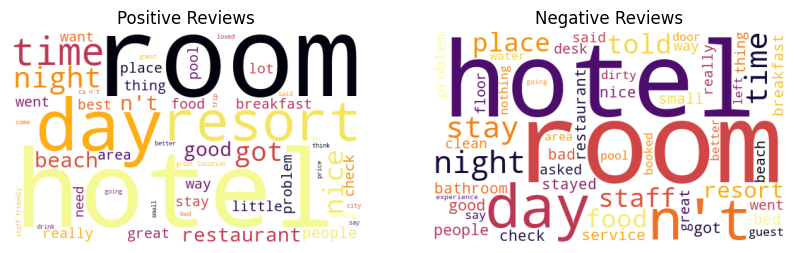

In [5]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("Code_7.csv")

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

positive_text = ""
negative_text = ""

def getClass(text):
    global positive_text, negative_text

    ps = sia.polarity_scores(str(text))
    score = ps["compound"]

    if score > 0.05:
        positive_text += " " + str(text)
    elif score < -0.05:
        negative_text += " " + str(text)

# Apply function on Review column
data["Review"].apply(getClass)

# Generate wordclouds
wc_positive = WordCloud(
    max_words=50,
    width=500,
    height=300,
    colormap="inferno",
    background_color="white"
).generate(positive_text)

wc_negative = WordCloud(
    max_words=50,
    width=500,
    height=300,
    colormap="inferno",
    background_color="white"
).generate(negative_text)

# Plot word clouds
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(wc_positive)
plt.axis("off")
plt.title("Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wc_negative)
plt.axis("off")
plt.title("Negative Reviews")

# Save and show
plt.savefig("reviews.pdf")
plt.show()
